In [1]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [3]:
base_url = "C:\\dsprojects\\data\\"
vegetables_dataset_url = base_url + "simple_vegetable_sales_data.csv"

In [4]:
df = pd.read_csv(vegetables_dataset_url)

In [5]:
df

,Month,Sales(kg),Supplier_Name
0,1,3675.25,Walmart
1,2,4588.39,Walmart
2,3,5079.92,Walmart
3,4,5541.03,Walmart
4,5,6134.35,Walmart
...,...,...,...
355,32,1109.79,Target
356,33,1496.39,Target
357,34,1964.41,Target
358,35,2534.27,Target


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          360 non-null    int64  
 1   Sales(kg)      360 non-null    float64
 2   Supplier_Name  360 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 8.6+ KB


In [7]:
df.shape

(360, 3)

In [8]:
df.head()

,Month,Sales(kg),Supplier_Name
0,1,3675.25,Walmart
1,2,4588.39,Walmart
2,3,5079.92,Walmart
3,4,5541.03,Walmart
4,5,6134.35,Walmart


In [9]:
df.describe()

,Month,Sales(kg)
count,360.000000,360.000000
mean,18.500000,3839.655694
std,10.402753,2779.241967
min,1.000000,-245.390000
25%,9.750000,1140.667500
50%,18.500000,3793.370000
75%,27.250000,6135.475000
max,36.000000,9798.100000


In [29]:
df[df["Supplier_Name"] == "Carrefour"]["Sales(kg)"].mean()

4078.692222222222

In [33]:
df[df["Supplier_Name"] == "Schwarz"]["Sales(kg)"].describe()#Schwarz firmasının satış istatistikleri

count      36.000000
mean     4697.352222
std      3267.735339
min       103.210000
25%      1457.402500
50%      4673.985000
75%      7886.232500
max      9624.600000
Name: Sales(kg), dtype: float64

In [31]:
df[df["Supplier_Name"] == "Kroger"]["Sales(kg)"].describe() #kroger firmasının satış istatistikleri

count      36.000000
mean     3953.310000
std      2825.095251
min         0.560000
25%      1270.500000
50%      3814.720000
75%      6703.535000
max      8272.370000
Name: Sales(kg), dtype: float64

In [34]:
df.isnull().sum() #Eksik Değerler

Month            0
Sales(kg)        0
Supplier_Name    0
dtype: int64

In [35]:
df['Supplier_Name'].nunique() #tedarikçi sayısı

10

In [37]:
df.groupby('Month')['Sales(kg)'].mean() #ay başına düşen ortlama satış

Month
1     3748.924
2     4581.806
3     5129.207
4     5830.922
5     6352.562
6     6891.882
7     7242.671
8     7543.725
9     7655.377
10    7681.081
11    7608.191
12    7401.503
13    7041.981
14    6643.544
15    6150.077
16    5472.766
17    4796.975
18    4175.547
19    3626.621
20    2766.378
21    2123.469
22    1659.984
23     915.165
24     579.439
25     269.698
26      99.362
27     137.425
28      76.235
29     256.763
30     491.001
31     767.974
32    1239.259
33    1772.333
34    2599.852
35    3073.571
36    3824.335
Name: Sales(kg), dtype: float64

In [38]:
df.groupby("Supplier_Name")["Sales(kg)"].sum() #Tedarikçi Bazında Toplam Satış Hacmi

Supplier_Name
Aldi         116172.12
Carrefour    146832.92
Costco       117367.56
Kroger       142319.16
Lidl         174825.05
Metro        131748.24
Schwarz      169104.68
Target       111729.11
Tesco        140515.41
Walmart      131661.80
Name: Sales(kg), dtype: float64

In [41]:
df.groupby('Supplier_Name')['Sales(kg)'].sum().idxmax() #En Yüksek Satış Hacmine Sahip Tedarikçi

'Lidl'

In [42]:
df.groupby('Month')['Sales(kg)'].sum() #Ay Bazında Toplam Satış Hacmi:

Month
1     37489.24
2     45818.06
3     51292.07
4     58309.22
5     63525.62
6     68918.82
7     72426.71
8     75437.25
9     76553.77
10    76810.81
11    76081.91
12    74015.03
13    70419.81
14    66435.44
15    61500.77
16    54727.66
17    47969.75
18    41755.47
19    36266.21
20    27663.78
21    21234.69
22    16599.84
23     9151.65
24     5794.39
25     2696.98
26      993.62
27     1374.25
28      762.35
29     2567.63
30     4910.01
31     7679.74
32    12392.59
33    17723.33
34    25998.52
35    30735.71
36    38243.35
Name: Sales(kg), dtype: float64

In [46]:
df.groupby(['Supplier_Name', 'Month'])['Sales(kg)'].std().reset_index().head() #Tedarikçi Bazında Aylık Satışın Standart Sapması:

,Supplier_Name,Month,Sales(kg)
0,Aldi,1,NaN
1,Aldi,2,NaN
2,Aldi,3,NaN
3,Aldi,4,NaN
4,Aldi,5,NaN


In [49]:
#supplier_monthly_std = 
df.groupby(['Supplier_Name', 'Month'])['Sales(kg)'].std(ddof=0).reset_index()

,Supplier_Name,Month,Sales(kg)
0,Aldi,1,0.0
1,Aldi,2,0.0
2,Aldi,3,0.0
3,Aldi,4,0.0
4,Aldi,5,0.0
...,...,...,...
355,Walmart,32,0.0
356,Walmart,33,0.0
357,Walmart,34,0.0
358,Walmart,35,0.0


In [53]:
supplier_monthly_std = df.groupby(['Supplier_Name', 'Month'])['Sales(kg)'].agg(lambda x: x.std() if len(x) >= 2 else None).reset_index(name='Sales_std')
print("\nTedarikçi Bazında Aylık Satışın Standart Sapması:")
print(supplier_monthly_std.head())


Tedarikçi Bazında Aylık Satışın Standart Sapması:
  Supplier_Name  Month Sales_std
0          Aldi      1      None
1          Aldi      2      None
2          Aldi      3      None
3          Aldi      4      None
4          Aldi      5      None


In [54]:
monthly_total_sales = df.groupby('Month')['Sales(kg)'].sum().reset_index()
monthly_total_sales['Growth_Rate'] = monthly_total_sales['Sales(kg)'].pct_change() * 100

print("\nAy Bazında Toplam Satışların Yıllık Büyüme Oranı:")
print(monthly_total_sales)


Ay Bazında Toplam Satışların Yıllık Büyüme Oranı:
    Month  Sales(kg)  Growth_Rate
0       1   37489.24          NaN
1       2   45818.06    22.216561
2       3   51292.07    11.947276
3       4   58309.22    13.680770
4       5   63525.62     8.946098
5       6   68918.82     8.489803
6       7   72426.71     5.089887
7       8   75437.25     4.156671
8       9   76553.77     1.480065
9      10   76810.81     0.335764
10     11   76081.91    -0.948955
11     12   74015.03    -2.716651
12     13   70419.81    -4.857419
13     14   66435.44    -5.658024
14     15   61500.77    -7.427767
15     16   54727.66   -11.013049
16     17   47969.75   -12.348253
17     18   41755.47   -12.954581
18     19   36266.21   -13.146206
19     20   27663.78   -23.720234
20     21   21234.69   -23.240100
21     22   16599.84   -21.826784
22     23    9151.65   -44.869047
23     24    5794.39   -36.684751
24     25    2696.98   -53.455325
25     26     993.62   -63.158051
26     27    1374.25    38.3074

In [56]:
monthly_total_sales = df.groupby('Month')['Sales(kg)'].sum().reset_index()
monthly_total_sales['Growth_Rate'] = monthly_total_sales['Sales(kg)'].pct_change() * 100

# Ana DataFrame'e büyüme oranlarını ekleyerek yeni bir DataFrame oluştur
df_growth_rate = pd.merge(df, monthly_total_sales[['Month', 'Growth_Rate']], on='Month', how='left')
df_growth_rate


,Month,Sales(kg),Supplier_Name,Growth_Rate
0,1,3675.25,Walmart,NaN
1,2,4588.39,Walmart,22.216561
2,3,5079.92,Walmart,11.947276
3,4,5541.03,Walmart,13.680770
4,5,6134.35,Walmart,8.946098
...,...,...,...,...
355,32,1109.79,Target,61.367312
356,33,1496.39,Target,43.015544
357,34,1964.41,Target,46.690944
358,35,2534.27,Target,18.220999


In [57]:
# Tedarikçi bazında satışın medyan değeri ve ortalama değeri arasındaki farkın hesaplanması
supplier_sales_stats = df.groupby('Supplier_Name')['Sales(kg)'].agg(['median', 'mean'])
supplier_sales_stats['Difference'] = supplier_sales_stats['mean'] - supplier_sales_stats['median']
print("\nTedarikçi Bazında Satışın Medyan ve Ortalama Değerleri Arasındaki Fark:")
print(supplier_sales_stats)


Tedarikçi Bazında Satışın Medyan ve Ortalama Değerleri Arasındaki Fark:
                 median         mean  Difference
Supplier_Name                                   
Aldi           3415.420  3227.003333 -188.416667
Carrefour      4033.465  4078.692222   45.227222
Costco         3277.730  3260.210000  -17.520000
Kroger         3814.720  3953.310000  138.590000
Lidl           4732.655  4856.251389  123.596389
Metro          3613.415  3659.673333   46.258333
Schwarz        4673.985  4697.352222   23.367222
Target         3032.780  3103.586389   70.806389
Tesco          3872.485  3903.205833   30.720833
Walmart        3650.690  3657.272222    6.582222


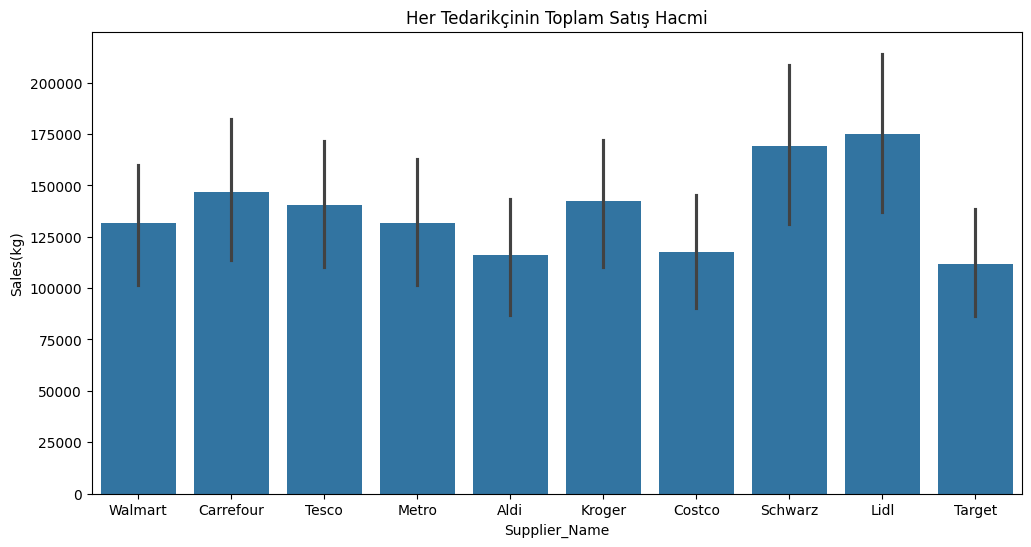

In [58]:
# Her bir tedarikçinin toplam satış hacmini görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Supplier_Name', y='Sales(kg)', data=df, estimator=sum)
plt.title('Her Tedarikçinin Toplam Satış Hacmi')
plt.show()

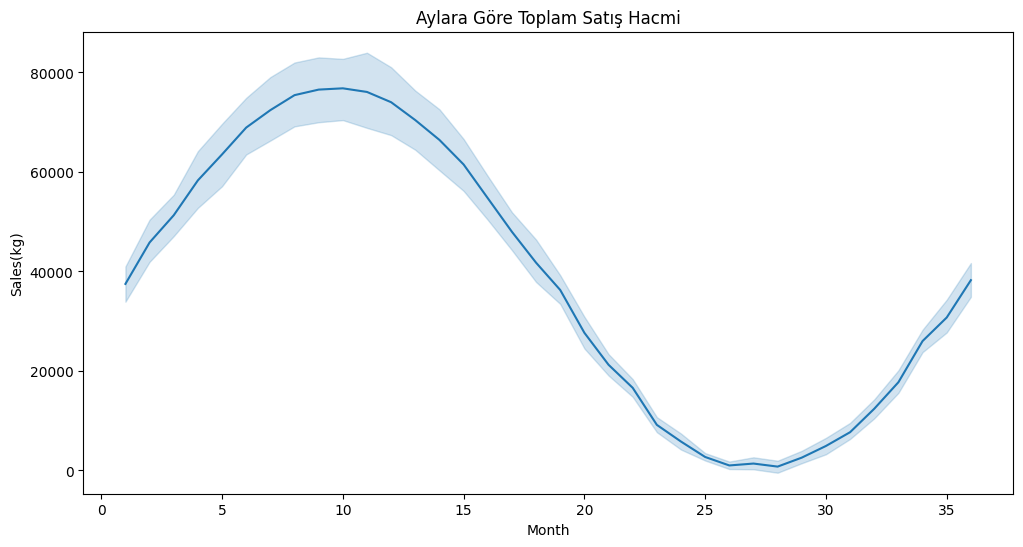

In [59]:
# Aylara göre toplam satış hacmini görselleştirme
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales(kg)', data=df, estimator=sum)
plt.title('Aylara Göre Toplam Satış Hacmi')
plt.show()

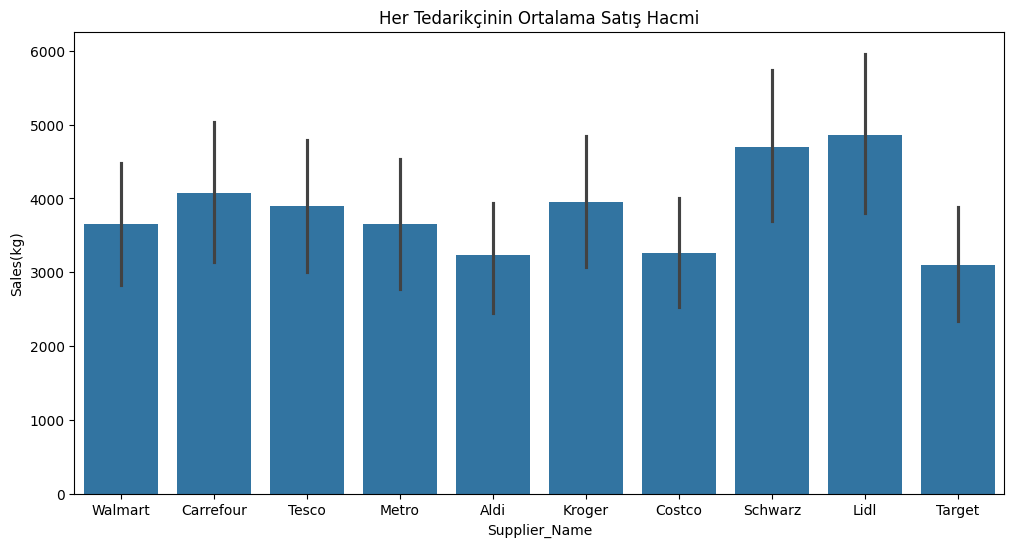

In [60]:
# Tedarikçi bazında ortalama satış hacmini görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Supplier_Name', y='Sales(kg)', data=df, estimator='mean')
plt.title('Her Tedarikçinin Ortalama Satış Hacmi')
plt.show()

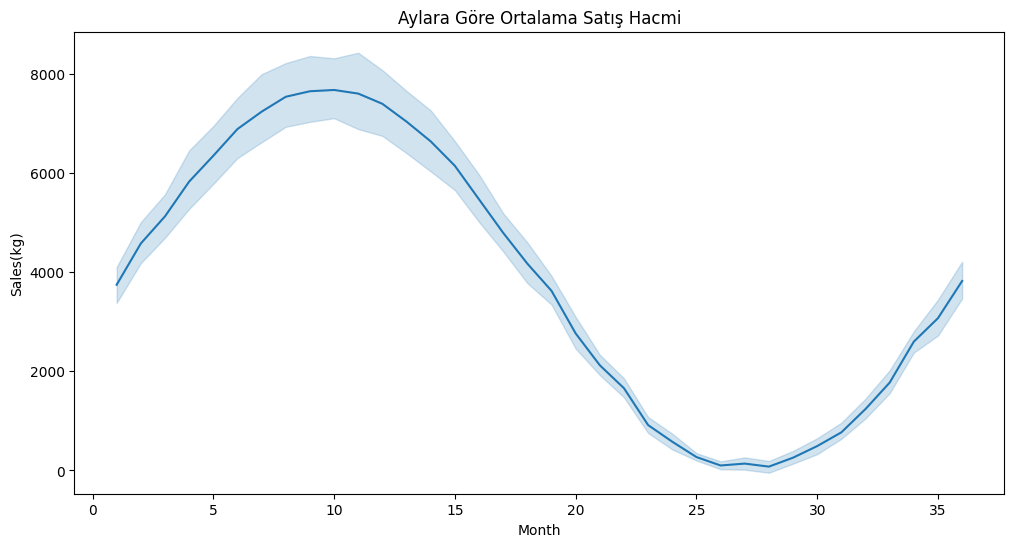

In [61]:
# Aylara göre ortalama satış hacmini görselleştirme
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales(kg)', data=df, estimator='mean')
plt.title('Aylara Göre Ortalama Satış Hacmi')
plt.show()

In [71]:
supplier_monthly_stats = df.groupby(['Supplier_Name', 'Month'])['Sales(kg)'].agg(['sum', 'mean', 'std']).reset_index()
supplier_monthly_stats

,Supplier_Name,Month,sum,mean,std
0,Aldi,1,3251.27,3251.27,NaN
1,Aldi,2,3722.32,3722.32,NaN
2,Aldi,3,4645.63,4645.63,NaN
3,Aldi,4,4732.65,4732.65,NaN
4,Aldi,5,5193.56,5193.56,NaN
...,...,...,...,...,...
355,Walmart,32,963.30,963.30,NaN
356,Walmart,33,1434.93,1434.93,NaN
357,Walmart,34,2755.33,2755.33,NaN
358,Walmart,35,2893.41,2893.41,NaN


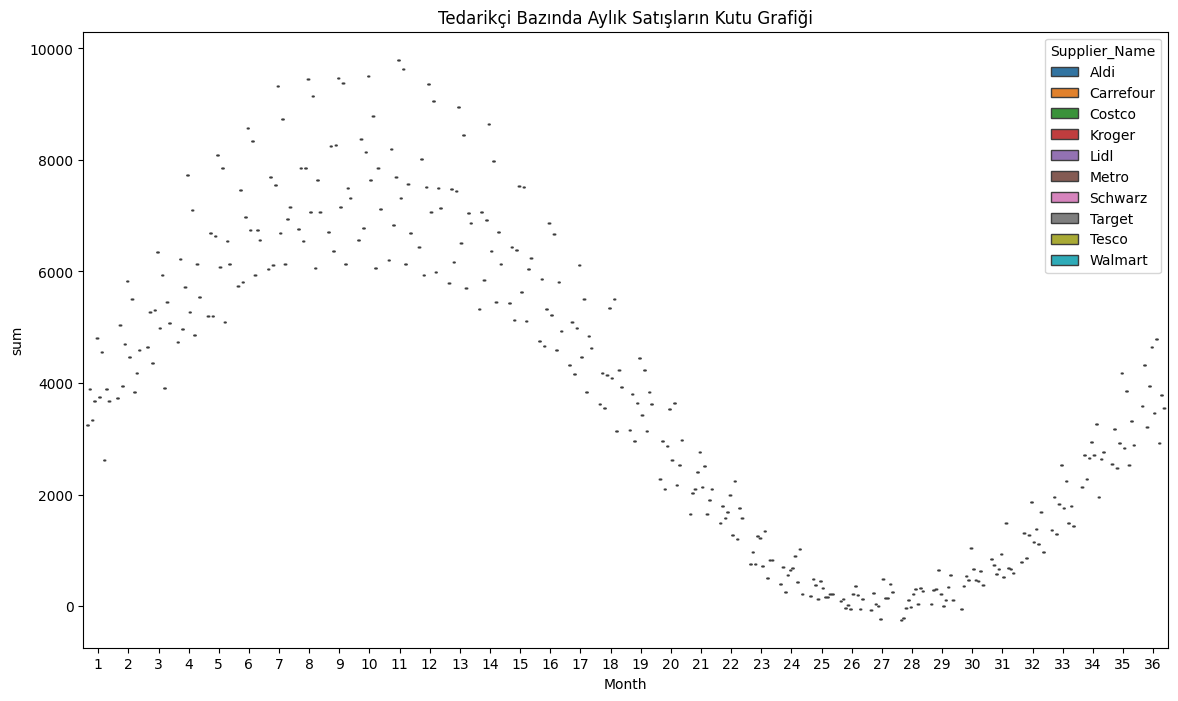

In [72]:
# Tedarikçi bazında aylık satışların kutu grafiği
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='sum', hue='Supplier_Name', data=supplier_monthly_stats)
plt.title('Tedarikçi Bazında Aylık Satışların Kutu Grafiği')
plt.show()

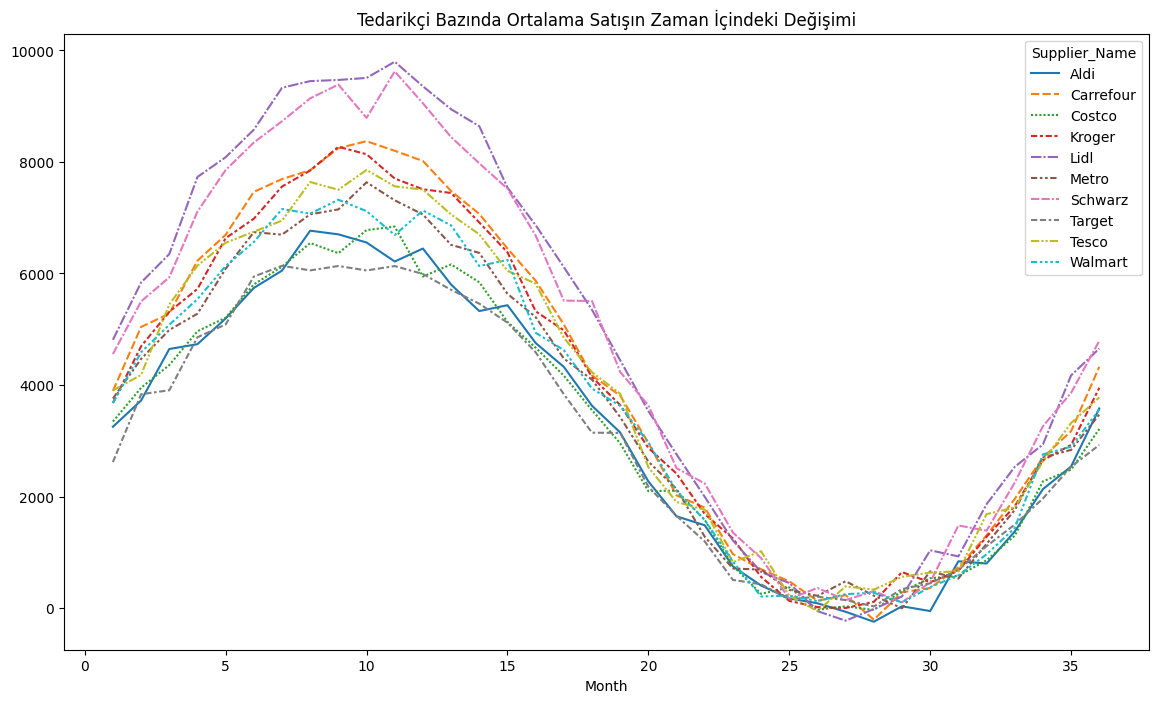

In [73]:
# Tedarikçi bazında ortalama satışın zaman içindeki değişimi
supplier_avg_sales_over_time = df.groupby(['Supplier_Name', 'Month'])['Sales(kg)'].mean().unstack()
plt.figure(figsize=(14, 8))
sns.lineplot(data=supplier_avg_sales_over_time.T)
plt.title('Tedarikçi Bazında Ortalama Satışın Zaman İçindeki Değişimi')
plt.show()

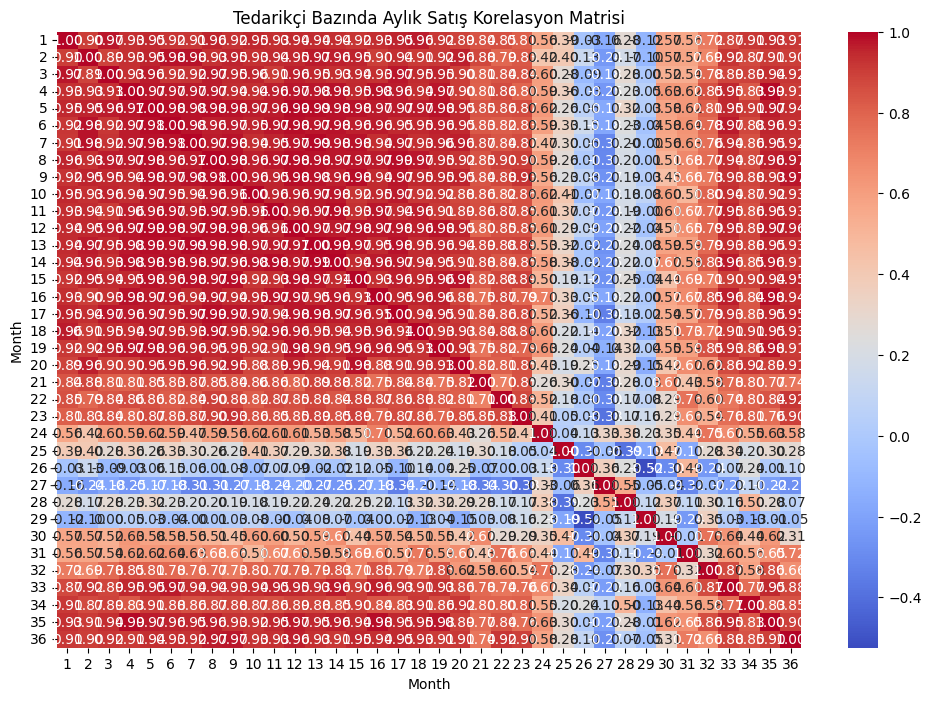

In [74]:
# Tedarikçi bazında aylık satış korelasyon matrisi
supplier_monthly_corr = df.groupby(['Supplier_Name', 'Month'])['Sales(kg)'].sum().unstack().corr()
plt.figure(figsize=(12, 8))
sns.heatmap(supplier_monthly_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Tedarikçi Bazında Aylık Satış Korelasyon Matrisi')
plt.show()